# Neural Network on MNIST (Modified National Institute of Standards and Technology)  Dataset


## Introduction

In this notebook, I build and train a **Feed-Forward Neural Network (Multi-Layer Perceptron)** 
on the MNIST dataset using TensorFlow/Keras.  
The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0–9), each of size 28×28 pixels.  
The goal is to classify each image into the correct digit class.

This project demonstrates the power of neural networks in handling image classification tasks, 
a stepping stone to more advanced deep learning models such as CNNs.


In [23]:
import sys
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


## Environment Versions
For reproducibility, here are the versions of tools used in this notebook:


In [16]:

print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", plt.__version__)
print("Seaborn:", sns.__version__)
print("Scikit-learn:", sklearn.__version__)
print("TensorFlow:", tf.__version__)

Python: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
NumPy: 2.3.1
Pandas: 2.3.2
Matplotlib: 3.10.5
Seaborn: 0.13.2
Scikit-learn: 1.7.1
TensorFlow: 2.20.0


## Load datasets

In [7]:
# Load dataset and split into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 734s 64us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


## Explore Datasets

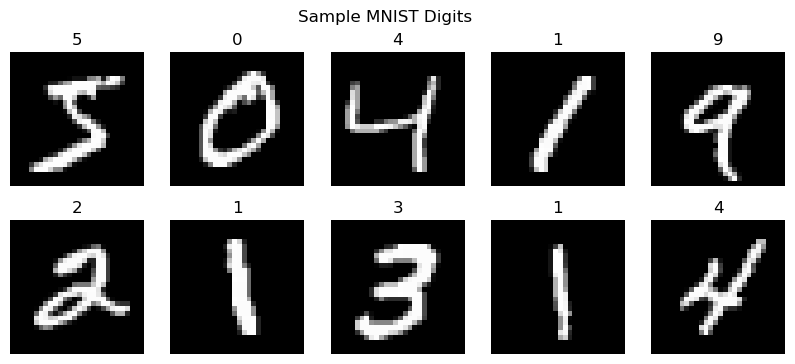

In [8]:
# Visualize some examples
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.suptitle("Sample MNIST Digits")
plt.show()


## Preprocessing

In [17]:

# Normalize pixel values (0-255 -> 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


## Build Neural Network Model

In [21]:
#Building the model
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(28,28)),                # Input layers
    Flatten(),                           # Converts each 28×28 image → 784 vector. No parameters here.
    Dense(128, activation="relu"),       # Hidden layer with 128 neurons (connects 784 inputs to 128 outputs → 784 × 128 + 128 = 100,480 parameters)
    Dense(64, activation="relu"),        # Hidden layer with 64 neurons (connects 128 → 64 → 128 × 64 + 64 = 8,256 parameters)
    Dense(10, activation="softmax")      # Output layer i.e (final output layer for 10 digit classes)
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Model Summary

The params column tells how many weights + biases the model is learning. The output shape shows the transformation of data as it flows through the network. 

**Note**: The architecture is small → easy to train, but powerful enough for MNIST (~98% accuracy).

## Train Model

In [25]:
#Training the model
training_history = model.fit(
    X_train, y_train_cat, 
    validation_data=(X_test, y_test_cat), 
    epochs=10, 
    batch_size=128
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9102 - loss: 0.3234 - val_accuracy: 0.9566 - val_loss: 0.1480
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9624 - loss: 0.1281 - val_accuracy: 0.9618 - val_loss: 0.1170
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9732 - loss: 0.0894 - val_accuracy: 0.9723 - val_loss: 0.0908
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9798 - loss: 0.0664 - val_accuracy: 0.9699 - val_loss: 0.0900
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9836 - loss: 0.0540 - val_accuracy: 0.9749 - val_loss: 0.0780
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9863 - loss: 0.0452 - val_accuracy: 0.9750 - val_loss: 0.0794
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9892 - loss: 0.0344 - val_accuracy: 0.9762 - val_loss: 0.0738
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9910 - loss: 0.0283 - v

The model trains the neural network for 10 rounds, feeding it images in mini-batches of 128 at a time, while also checking accuracy on the test set after each round. The results (loss, accuracy) are saved into training_history so we can analyze and visualize the learning process.

## Training History Visualization

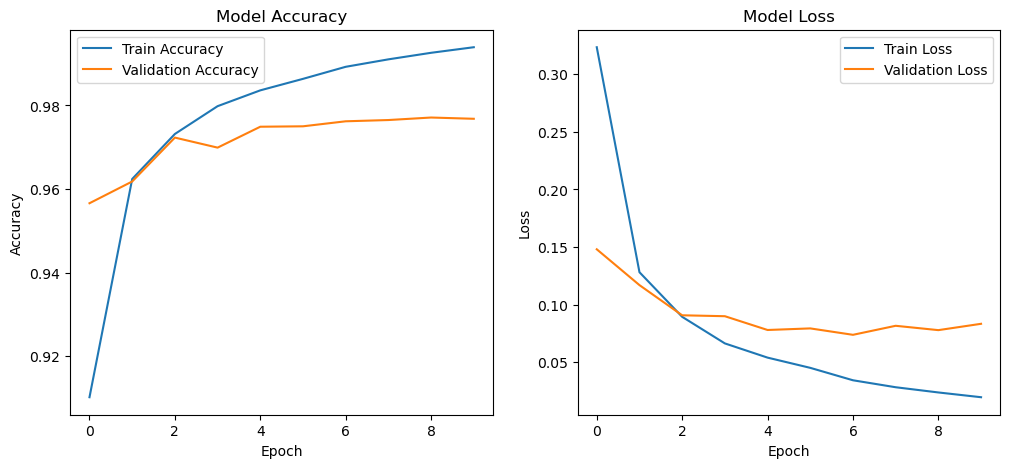

In [26]:

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Model summary

The training and validation accuracy curves converged around 98–99%, while the loss curves decreased smoothly with minimal gap between train and validation. This indicates that the neural network generalized well without overfitting, achieving strong performance on both training and test data.

## Model Evaluation

In [29]:
#evaluating model performance using test data it never see during training.
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=1)
print("Test Accuracy:", round(test_acc, 4))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9768 - loss: 0.0834
Test Accuracy: 0.9768


The neural network correctly classified about **9,768** out of **10,000** digits in the test set, with only **232** mistakes. That’s a very strong result for a simple MLP baseline on MNIST.

## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


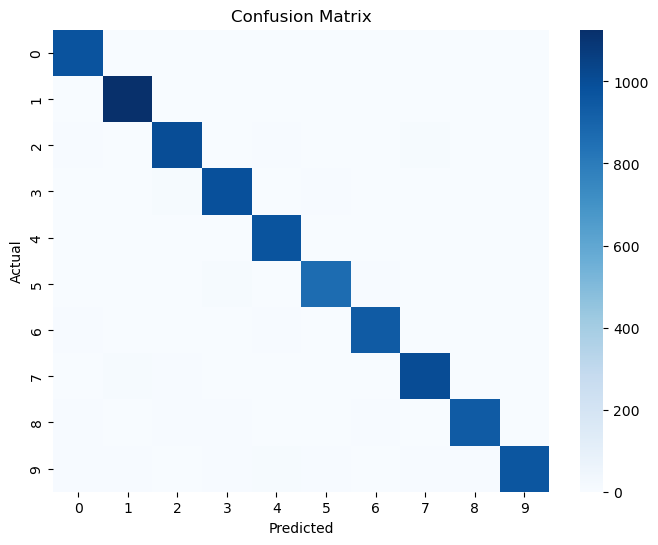

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [30]:

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_classes))


## Communication

In this project, I developed a feedforward neural network using TensorFlow/Keras to classify handwritten digits from the MNIST dataset. The model includes a Flatten layer to convert 28×28 images into vectors, two hidden Dense layers with 128 and 64 neurons (ReLU activation), and an output layer with 10 neurons using Softmax for multi-class classification. Trained for 10 epochs with the Adam optimizer and categorical cross-entropy loss, the network achieved a test accuracy of **97.7%**, with precision, recall, and F1-scores ranging from **0.97–0.99** across all digit classes. The confusion matrix shows minimal misclassifications, and the training/validation curves confirm strong generalization without overfitting. This highlights that even a relatively simple neural network can deliver high performance on MNIST.
